<a href="https://colab.research.google.com/github/IamHassanAb/Machine-Learning/blob/main/California_Housing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import sklearn.metrics as metrics
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    minmax_scale,
)

In [ ]:
sklearn.__version__

'1.2.2'

*Attribute Description:*
* MedInc median income in block group
* HouseAge median house age in block group
* AveRooms average number of rooms per household
* AveBedrms average number of bedrooms per household
* Population block group population
* AveOccup average number of people per household
* Latitude block group latitude
* Longitude block group longitude

*Target Variable*
* MedHouseVal($100k): Median House Value

In [2]:
housing = fetch_california_housing(as_frame=True).frame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

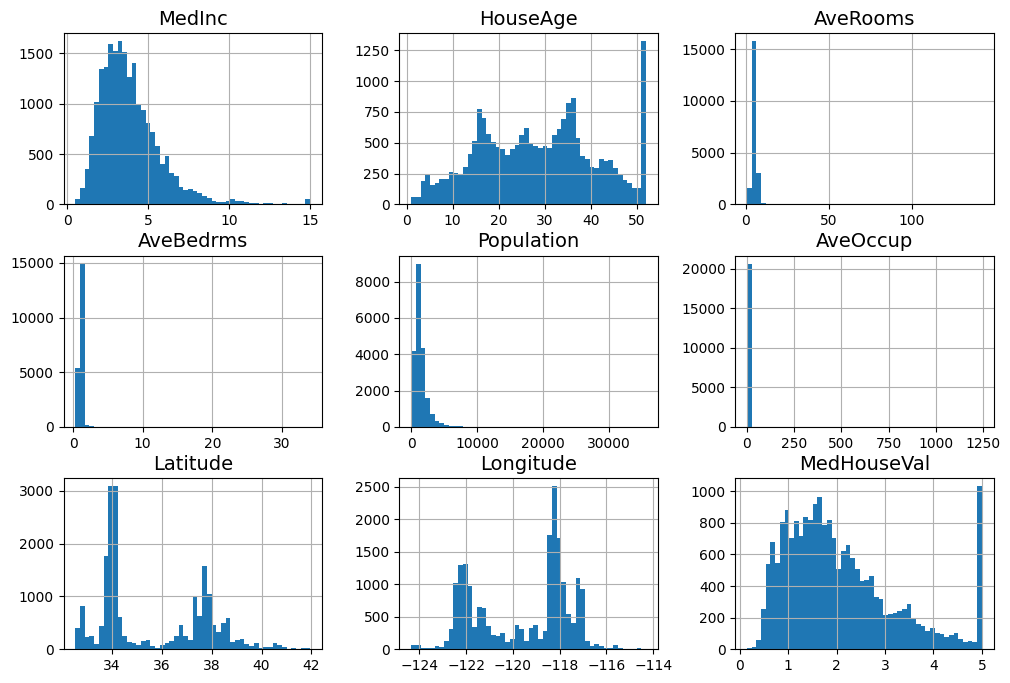

In [6]:
housing.hist(bins=50, figsize=(12, 8))
plt.show()



*   MedInc is in (tens of thousands) roughly
*   Housing Median Age and value is also capped. The MedHouseVal is an important feature (output) so, check with the client team if there is a problem there are two solutions:
 * Collect proper labels for the districts whose labels were capped.
 * Remove those districts (capped districts) from training and test set.
* Different scales used.
* Finally, alsmost all distributions are skewed so, we will need to transform that as well to be (symmetrical and bell curved distributions) suitable for some ML algorithms.





## Creating Train/Test Set

In [ ]:
np.random.seed(42)
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) #non-repeating random numbers
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set),len(test_set),

(16512, 4128)

In [7]:
#alternatively
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2,random_state=42)

To make the dataset representative of median income (Stratifying)

In [8]:
housing["income_cat"] = pd.cut(housing['MedInc'],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

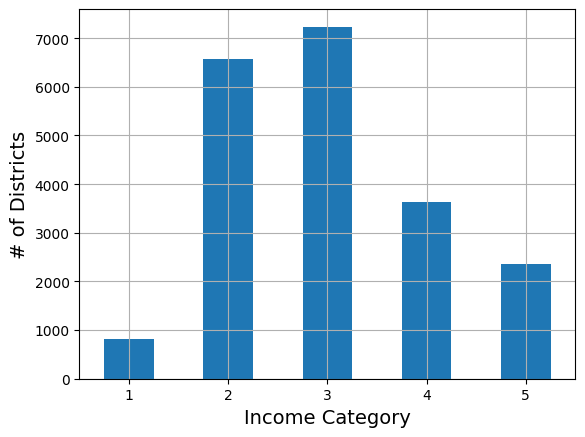

In [9]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel('Income Category')
plt.ylabel('# of Districts')
plt.show()

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit
# returns stratified randomized splits/folds so, representative of the categories (i.e. med income) in our case.

from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2,
random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
 strat_train_set_n = housing.iloc[train_index]
strat_test_set_n = housing.iloc[test_index]
strat_splits.append([strat_train_set_n, strat_test_set_n])

In [ ]:
strat_train_set, strat_test_set = strat_splits[0]

In [10]:
#Alternative to Above
strat_train_set, strat_test_set = train_test_split(
housing, test_size=0.2, stratify=housing["income_cat"],
random_state=42)

In [ ]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [ ]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.02,0.36,0.97
2,31.88,31.88,32.44,-0.02,1.73
3,35.06,35.05,35.85,-0.01,2.27
4,17.63,17.64,16.74,0.03,-5.06
5,11.44,11.43,10.95,-0.08,-4.32


In [11]:
for set_ in (strat_train_set,strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights
First, make sure you have put the test set aside and you are only exploring the
training set. Also, if the training set is very large, you may want to sample an
exploration set, to make manipulations easy and fast during the exploration
phase.

In [12]:
housing = strat_train_set.copy()
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
12655,2.1736,29.0,5.485836,1.128895,2237.0,3.168555,38.52,-121.46,0.721
15502,6.3373,7.0,6.927083,1.113281,2015.0,2.623698,33.09,-117.23,2.796
2908,2.8750,44.0,5.393333,1.033333,667.0,2.223333,35.37,-119.04,0.827
14053,2.2264,24.0,3.886128,1.074534,898.0,1.859213,32.75,-117.13,1.125
20496,4.4964,27.0,6.096552,1.113793,1837.0,3.167241,34.28,-118.70,2.383


### Visualize Geographical Data

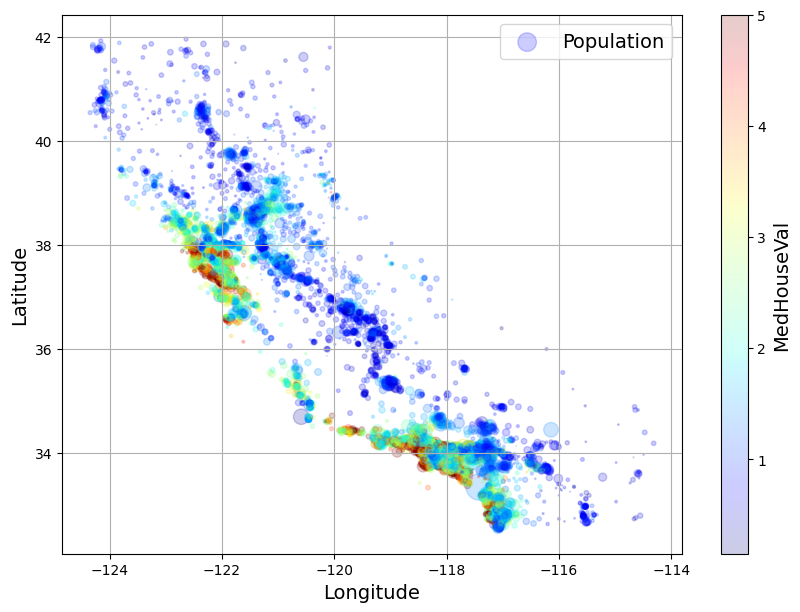

California Housing:
Circle Size : Large (Dense Population) <-> Small (Thin Population)
Color : Red(Expensive) <-> Blue(Cheap)


In [13]:
housing.plot(kind='scatter', x='Longitude', y='Latitude', grid=True, alpha=0.2,
             s=housing["Population"]/100, label="Population",
             c="MedHouseVal", cmap='jet',colorbar=True,
             legend=True, sharex=False, figsize=(10,7))
plt.show()
print(f"""California Housing:
Circle Size : Large (Dense Population) <-> Small (Thin Population)
Color : Red(Expensive) <-> Blue(Cheap)""")

### Visualize Correlations

The correlation coefficient only measure linear correlations. as we can see in the picture:

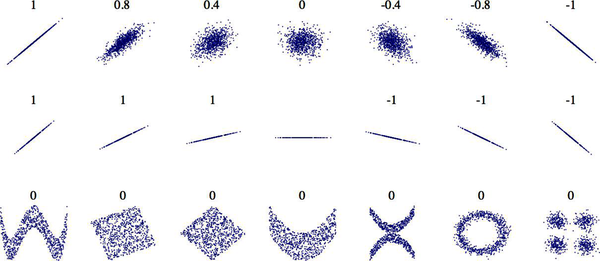

In [14]:
houseing_corr = housing.corr()
houseing_corr['MedHouseVal'].sort_values(ascending=False)

MedHouseVal    1.000000
MedInc         0.687151
AveRooms       0.146255
HouseAge       0.114146
AveOccup      -0.021991
Population    -0.026882
AveBedrms     -0.043294
Longitude     -0.047466
Latitude      -0.142673
Name: MedHouseVal, dtype: float64

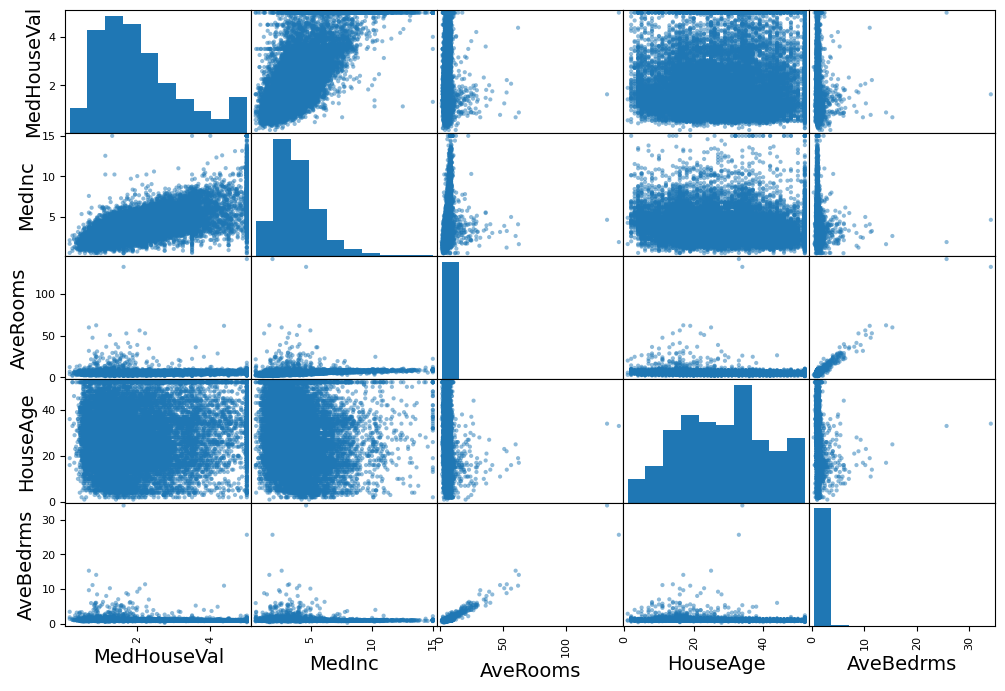

In [15]:
# MedInc	HouseAge	AveRooms	AveBedrms	Population	AveOccup	Latitude	Longitude	MedHouseVal
from pandas.plotting import scatter_matrix
attributes = ["MedHouseVal", "MedInc","AveRooms", "HouseAge",'AveBedrms']
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

We clearly see a string correlation between MedInc and MedHouseVal. So, let's zoom on that.

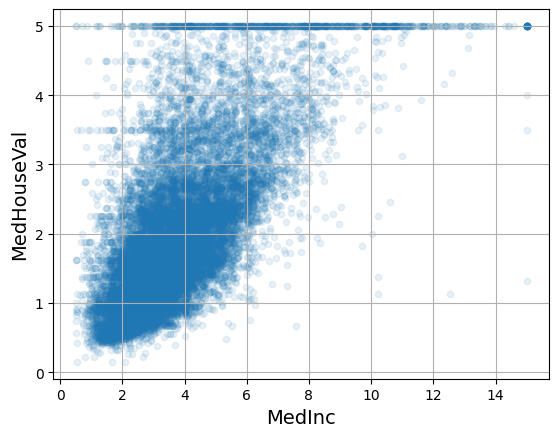

In [16]:
housing.plot(kind="scatter", x="MedInc", y="MedHouseVal",
alpha=0.1, grid=True)
plt.show()

### Experiment with Attribute Combinations
*Attribute Description:*
* MedInc median income in block group
* HouseAge median house age in block group
* AveRooms average number of rooms per household
* AveBedrms average number of bedrooms per household
* Population block group population
* AveOccup average number of household members
* Latitude block group latitude
* Longitude block group longitude

*Target Variable*
* MedHouseVal($100k): Median House Value

In [ ]:
housing['AveBedrmsRatio'] = housing['AveBedrms']/housing['AveRooms']

In [ ]:
print(f""" {housing.corr()['MedHouseVal']}

The Avg Bedrooms/Rooms ratio is much more (-vely) correlated with MedHouseVal.""")

 MedInc            0.687151
HouseAge          0.114146
AveRooms          0.146255
AveBedrms        -0.043294
Population       -0.026882
AveOccup         -0.021991
Latitude         -0.142673
Longitude        -0.047466
MedHouseVal       1.000000
AveBedrmsRatio   -0.259934
Name: MedHouseVal, dtype: float64

The Avg Bedrooms/Rooms ratio is much more (-vely) correlated with MedHouseVal.


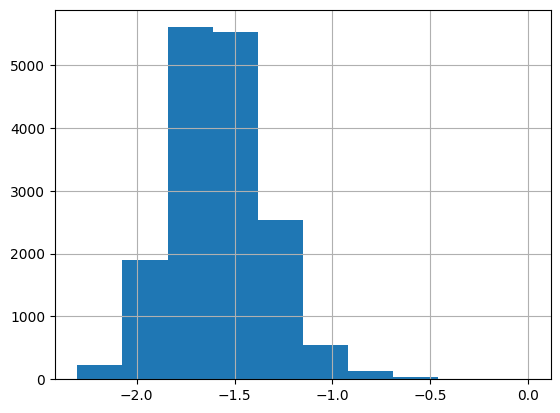

In [ ]:
# housing.plot(kind="scatter", x="AveBedrmsRatio", y="MedHouseVal",
# alpha=0.1, grid=True)
(np.log(housing['AveBedrms']/housing['AveRooms'])).hist()
plt.show()

# Preparing the Data for Machine Learning Algorithms

It is a good practise to write fucntions for this process so:
* This will allow you to reproduce these transformations easily on any
dataset (e.g., the next time you get a fresh dataset).
* You will gradually build a library of transformation functions that you can
reuse in future projects.
* You can use these functions in your live system to transform the new data
before feeding it to your algorithms.
* This will make it possible for you to easily try various transformations and
see which combination of transformations works best.


In [17]:
#Copy the clean dataset and seperate the Explanatory and Dependent variables (i.e. Dependent and Independent variables)
housing = strat_train_set.drop("MedHouseVal", axis=1)
housing_labels = strat_train_set["MedHouseVal"].copy()

### Clean Data
1. Get rid of the whole attribute with Null Values.
2. Set the missing values to some value (zero, the mean, the median, etc.).
This is called imputation.

In [ ]:
print(f""" {housing.info()}

No 'Null' values found

if null found:
  from sklearn.impute import SimpleImputer
  imputer = SimpleImputer(strategy="median")
or
  housing.drop("Feature_with_Nulls", axis=1)""")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      16512 non-null  float64
 1   HouseAge    16512 non-null  float64
 2   AveRooms    16512 non-null  float64
 3   AveBedrms   16512 non-null  float64
 4   Population  16512 non-null  float64
 5   AveOccup    16512 non-null  float64
 6   Latitude    16512 non-null  float64
 7   Longitude   16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB
 None

No 'Null' values found

if null found:
  from sklearn.impute import SimpleImputer
  imputer = SimpleImputer(strategy="median")
or
  housing.drop("Feature_with_Nulls", axis=1)


* Missing values can also be replaced with the mean value (strategy="mean").
* the most frequent value (strategy="most_frequent")
* or constant value (strategy="constant", fill_value=…). The last two
strategies support non-numerical data.

**Tip**
There are also more powerful imputers available in the
sklearn.impute package (both for numerical features only):
* **KNNImputer** replaces each missing value with the mean of the k-nearest neighbors’ values for that feature. The distance is based on all the available features.
* **IterativeImputer** trains a regression model per feature to predict the missing values based on all the other available features. It then trains the model again on the updated data, and repeats the process several times, improving the models and the replacement values at each iteration.

In [ ]:
# from sklearn import set_config
# # To output the values as a dataframe instead of Scipy Sparse or Np array
# set_config(transform_output="pandas")  # scikit-learn >= 1.2

### Removing Outliers

In [ ]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(housing)

In [ ]:
housing = housing.iloc[outlier_pred == 1]
housing_labels = housing_labels.iloc[outlier_pred == 1]

### Handling Text and Categorical Attributes

In [ ]:
# If the data is in Categorical form and we would like to convert it to ordinal form (i.e assign # to categories)
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
ordinal_encoder.categories_ # Get the categories

This method is fine in (for ordered categories such as “bad”, “average”, “good”, and
“excellent”)

But, when the categories are not ordered ML model will not be able to understand this like Nominal data (Cats and Dogs are two categories of pets can we order them No!)

**Fix:**

Binary Encoding
* One Hot Encoding (remembers the categories it is trained on.)
* sometimes called Dummyfiction (pd.get_dummies())

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# cat_encoder = OneHotEncoder()
# housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [ ]:
# df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEARBAY"]})
# pd.get_dummies(df_test)

###Feature Scaling and Transformation

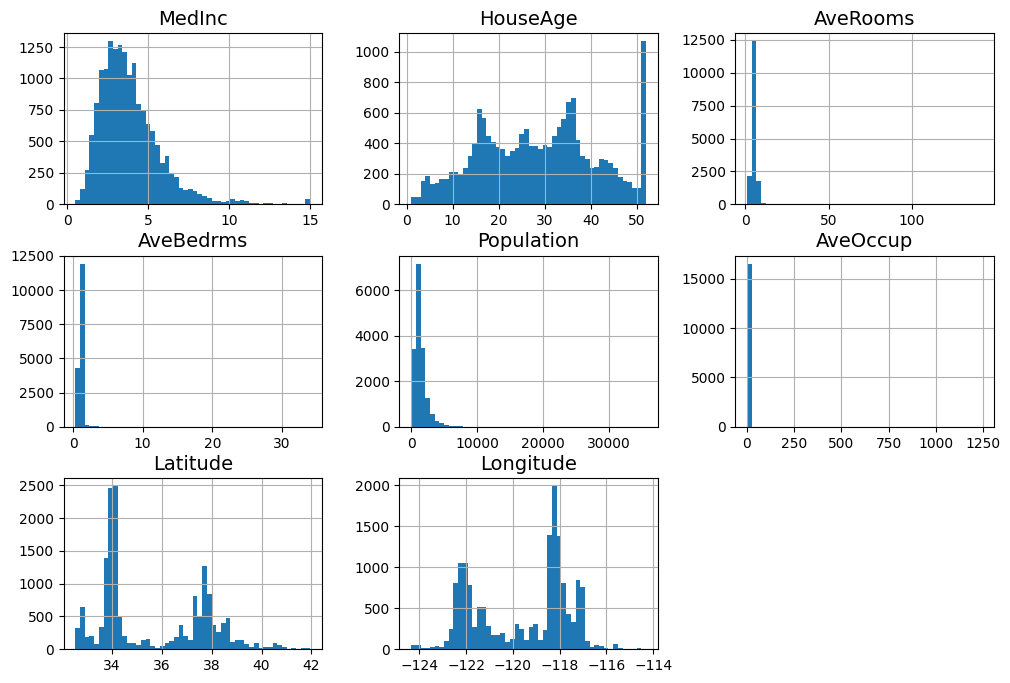

In [ ]:
housing.hist(bins=50, figsize=(12, 8))
plt.show()

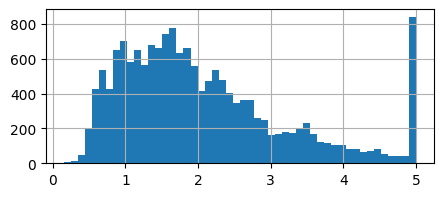

In [ ]:
housing_labels.hist(bins=50, figsize=(5,2))
plt.show()

**Log Transformation**

In [ ]:
# For a feature with heavy tail ()
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func=np.log)
log_medinc = log_transformer.transform(housing[["MedInc"]])
log_pop = log_transformer.transform(housing[["Population"]])
log_avgoccp =  log_transformer.transform(housing[["AveOccup"]])

(array([[<Axes: title={'center': 'MedInc'}>]], dtype=object),
 array([[<Axes: title={'center': 'Population'}>]], dtype=object),
 array([[<Axes: title={'center': 'AveOccup'}>]], dtype=object))

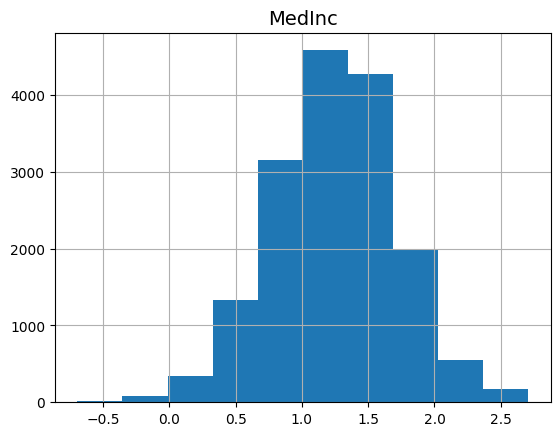

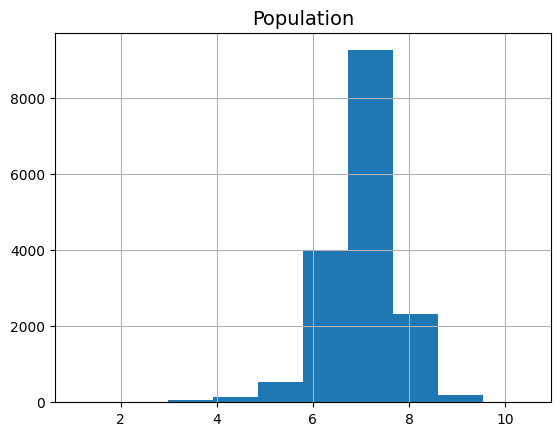

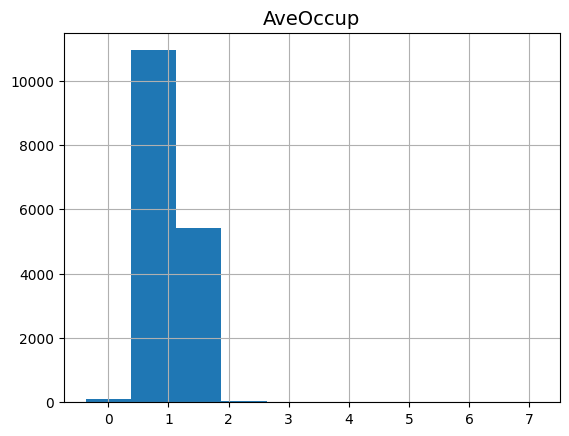

In [ ]:
log_medinc.hist(), log_pop.hist(), log_avgoccp.hist()

<Axes: >

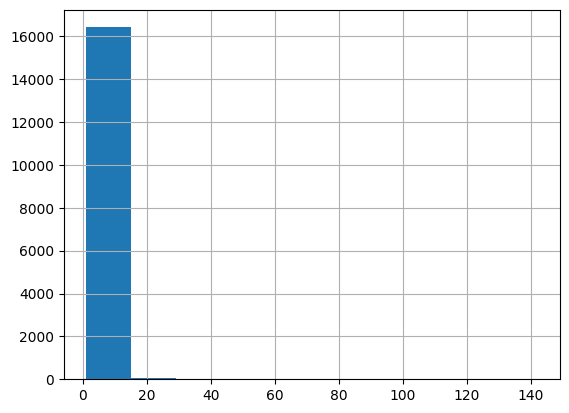

In [ ]:
housing['AveRooms'].hist()

<Axes: >

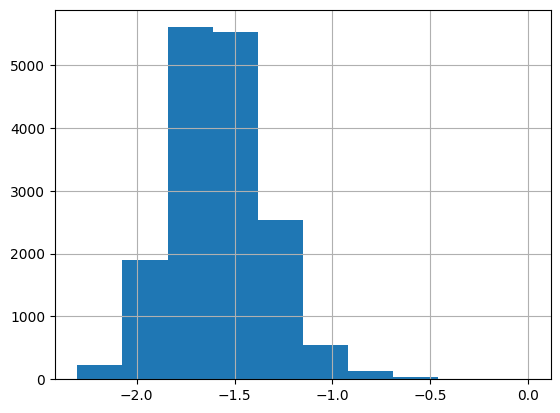

In [26]:
housing['AvgBedrms_ratio'] = housing['AveBedrms']/housing['AveRooms']
np.log(housing['AvgBedrms_ratio']).hist()

### Transformation Pipelines

As there are many steps required for transformation we will create a Transformation Pipeline
 * A few cluster similarity features will also be added. These will likely be more useful to the model than latitude and longitude.
 * Features with a long tail will be replaced by their logarithm, as most models prefer features with roughly uniform or Gaussian distributions.
 * All numerical features will be standardized, as most ML algorithms prefer when all features have roughly the same scale.

#### Some Pipeline basics

In [ ]:
set_config(display="diagram")
#all Scikit-Learn estimators will be rendered as interactive diagrams

In [ ]:
from sklearn.pipeline import make_pipeline
num_pipeline = make_pipeline(StandardScaler())

In [ ]:
housing_num_prepared = num_pipeline.fit_transform(housing)

In [ ]:
housing_num_prepared.round(2)

In [ ]:
from sklearn.compose import make_column_selector, make_column_transformer
preprocessing = make_column_transformer(
(num_pipeline, make_column_selector(dtype_include=np.number)),
)

In [ ]:
housing_prepared = preprocessing.fit_transform(housing)

In [ ]:
housing_prepared

#### Pipeline Creation Start

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import make_column_selector, make_column_transformer,ColumnTransformer


class ClusterSimilarity(BaseEstimator, TransformerMixin):
  """The K-Means Clustering algorithm, combined with the Radial Basis Function (RBF) kernel,
      is employed to identify the cluster centers and measure the similarity between each sample and the cluster center."""
  def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
    self.n_clusters = n_clusters
    self.gamma = gamma
    self.random_state = random_state

  def fit(self, X, y=None, sample_weight=None):
    self.kmeans_ = KMeans(self.n_clusters,
    random_state=self.random_state)
    self.kmeans_.fit(X, sample_weight=sample_weight)
    return self # always return self!

  def transform(self, X):
    return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

  def get_feature_names_out(self, names=None):
    return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [28]:
from sklearn.ensemble import IsolationForest

class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, random_state=None):
      self.random_state = random_state

    def fit(self, X, y=None):
      self.isolation_forest_ = IsolationForest(random_state=self.random_state)
      self.isolation_forest_.fit(X)
      return self

    def transform(self, X, y=None):
        return X.iloc[self.isolation_forest_.predict(X) == 1]

In [29]:
log_pipeline = make_pipeline(
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler(),
)

In [30]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1.0, random_state=42)
# outlier_remover = OutlierRemover(random_state=42)
# ("outlier_remover",outlier_remover,make_column_selector(dtype_include=np.number))
# ("outlier_remover",outlier_remover,housing_labels)

In [31]:
default_num_pipeline = make_pipeline(StandardScaler())

In [32]:
# from sklearn.compose import ColumnTransformer, make_column_selector

preprocessing = ColumnTransformer(
  [
    ("log", log_pipeline, ["MedInc", "Population", "AveOccup","AvgBedrms_ratio"]),
    ("geo", cluster_simil, ["Latitude", "Longitude"]),
  ],
  remainder=default_num_pipeline,
)

In [33]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(16512, 17)

In [34]:
df_housing_num_prepared = pd.DataFrame(
housing_prepared,
columns=preprocessing.get_feature_names_out(),
index=housing.index)

In [36]:
df_housing_num_prepared.head()

,log__MedInc,log__Population,log__AveOccup,log__AvgBedrms_ratio,geo__Cluster 0 similarity,geo__Cluster 1 similarity,geo__Cluster 2 similarity,geo__Cluster 3 similarity,geo__Cluster 4 similarity,geo__Cluster 5 similarity,geo__Cluster 6 similarity,geo__Cluster 7 similarity,geo__Cluster 8 similarity,geo__Cluster 9 similarity,remainder__HouseAge,remainder__AveRooms,remainder__AveBedrms
12655,-0.998832,0.938249,0.405078,-0.011656,3.391002e-16,4.706064e-01,3.412889e-01,7.924424e-04,1.386519e-03,4.218373e-23,1.070616e-13,8.217042e-01,1.493399e-07,1.579689e-01,0.027564,0.017395,0.060107
15502,1.277742,0.796538,-0.290527,-1.022469,4.197435e-01,1.850749e-16,3.103690e-22,1.571143e-08,1.696260e-39,8.956753e-01,1.233912e-01,1.272655e-22,6.521017e-05,7.678546e-18,-1.722018,0.569256,0.029314
2908,-0.403837,-0.702499,-0.900923,-0.303797,1.810043e-02,6.391756e-05,2.728302e-08,1.582900e-01,2.749807e-19,3.369295e-05,1.041204e-01,2.191546e-08,5.466398e-01,6.801739e-06,1.220460,-0.018024,-0.128357
14053,-0.947769,-0.299288,-1.560265,1.196279,1.937594e-01,3.147969e-18,3.637793e-24,7.884287e-10,2.965799e-42,9.200897e-01,4.545497e-02,9.457060e-25,9.793789e-06,1.564997e-19,-0.370069,-0.595140,-0.047102
20496,0.547635,0.671139,0.403549,-0.498348,2.991692e-01,2.354275e-08,2.891705e-12,1.975151e-03,6.355713e-26,7.446022e-03,8.143973e-01,5.612523e-13,2.281453e-01,4.312614e-09,-0.131489,0.251241,0.030323


# Select and Train a Model

### Train and Evaluate on the Training Set

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['MedInc', 'Population',
                                                   'AveOccup',
                                                   'AvgBedrms_ratio']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['Latitude', 'Longitude'])])),
                ('linearregression', LinearRegression())])

In [ ]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)

array([0., 0., 0., 0., 0.])

In [ ]:
housing_labels.iloc[:5].values

array([0.721, 2.796, 0.827, 1.125, 2.383])

In [ ]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
lin_rmse

0.7024138813540481

**Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = make_pipeline(preprocessing, PolynomialFeatures(degree=2), LinearRegression())
poly_reg.fit(housing, housing_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['MedInc', 'Population',
                                                   'AveOccup',
                                                   'AvgBedrms_ratio']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['Latitude', 'Longitude'])])),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [ ]:
housing_predictions = poly_reg.predict(housing)
housing_predictions[:5].round(-2)

array([0., 0., 0., 0., 0.])

In [ ]:
from sklearn.metrics import mean_squared_error
poly_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
poly_rmse

0.5347242511897823

**Decision Trees**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing,
DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['MedInc', 'Population',
                                                   'AveOccup',
                                                   'AvgBedrms_ratio']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['Latitude', 'Longitude'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
tree_rmse

3.2975468754363183e-16

**Decision Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_reg.fit(housing, housing_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['MedInc', 'Population',
                                                   'AveOccup',
                                                   'AvgBedrms_ratio']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['Latitude', 'Longitude'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [ ]:
housing_predictions = forest_reg.predict(housing)
forest_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
forest_rmse

0.17888748488949074

**Neural Networks**

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp_reg = make_pipeline(preprocessing, MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam'))
mlp_reg.fit(housing,housing_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['MedInc', 'Population',
                                                   'AveOccup',
                                                   'AvgBedrms_ratio']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['Latitude', 'Longitude'])])),
                ('mlpregressor', MLPRegressor())])

In [ ]:
housing_predictions = mlp_reg.predict(housing)
mlp_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
mlp_rmse

0.47686990546292046

### Better Evaluation Using Cross-Validation
Scikit-Learn’s cross-validation features expect a utility function (greater is
better) rather than a cost function (lower is better), so the scoring
function is actually the opposite of the RMSE. It’s a negative value, so you
need to switch the sign of the output to get the RMSE scores.

**Decision Trees**

In [ ]:
from sklearn.model_selection import cross_val_score
tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error",cv=10)

In [ ]:
pd.Series(tree_rmses).describe()

count    10.000000
mean      0.677691
std       0.018881
min       0.639087
25%       0.664194
50%       0.687230
75%       0.688487
max       0.698362
dtype: float64

**Linear Regression**

In [ ]:
lin_reg_rmses = -cross_val_score(lin_reg, housing, housing_labels, scoring="neg_root_mean_squared_error",cv=10)

In [ ]:
pd.Series(lin_reg_rmses).describe()

count    10.000000
mean      0.705432
std       0.021579
min       0.675591
25%       0.688802
50%       0.714255
75%       0.716913
max       0.742762
dtype: float64

**Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = make_pipeline(preprocessing, PolynomialFeatures(degree=2), LinearRegression())
poly_rmses = -cross_val_score(poly_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
pd.Series(poly_rmses).describe()

count    10.000000
mean      0.556364
std       0.020204
min       0.531354
25%       0.536444
50%       0.559023
75%       0.570986
max       0.583655
dtype: float64

**Decision Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
pd.Series(forest_rmses).describe()

count    10.000000
mean      0.475384
std       0.023765
min       0.441186
25%       0.454867
50%       0.479069
75%       0.490988
max       0.512504
dtype: float64

**Neural Networks**

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp_reg = make_pipeline(preprocessing, MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam'))
mlp_rmses = -cross_val_score(mlp_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: Futu

In [ ]:
pd.Series(mlp_rmses).describe()

count    10.000000
mean      0.517236
std       0.018866
min       0.487108
25%       0.502249
50%       0.520487
75%       0.530132
max       0.547382
dtype: float64

# Fine-Tune Your Model
After shortlisting a promising model with default hyperparameters let's fine-tune them

### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
  ])
param_grid = [
  {'preprocessing__geo__n_clusters': [5, 8, 10],
  'random_forest__max_features': [4, 6, 8]},
  {'preprocessing__geo__n_clusters': [10, 15],
  'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

In [ ]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['MedInc', 'Population',
                                                   'AveOccup',
                                                   'AvgBedrms_ratio']),
                                                 ('geo',
                                                  ClusterSimilarity(n_clusters=15,
                                                                    random_state=42),
                                                  ['Latitude', 'Longitude'])])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

In [ ]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False,inplace=True)
cv_res = cv_res[["param_preprocessing__geo__n_clusters","param_random_forest__max_features",
        "split0_test_score","split1_test_score","split2_test_score","mean_test_score"]]
cv_res = cv_res.rename(columns={
    "param_preprocessing__geo__n_clusters":"n_clusters","param_random_forest__max_features":"max_features",
        "split0_test_score":"split0","split1_test_score":"split1","split2_test_score":"split2","mean_test_score":"mean_test_rmse"
})
cv_res[["split0", "split1", "split2", "mean_test_rmse"]] = -cv_res[["split0", "split1", "split2", "mean_test_rmse"]]

In [ ]:
cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,0.433261,0.446618,0.452625,0.444168
13,15,8,0.440822,0.453307,0.463621,0.452583
6,10,4,0.446429,0.455487,0.465498,0.455805
14,15,10,0.447702,0.459486,0.469604,0.458931
7,10,6,0.453945,0.461304,0.470980,0.462076


###Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {
    'preprocessing__geo__n_clusters': randint(low=3, high=50),
    'random_forest__max_features': randint(low=2, high=20)}
rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)
rnd_search.fit(housing, housing_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('log',
                                                                               Pipeline(steps=[('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out='one-to-one',
                                                                                                                    func=<ufunc 'log'>)),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['MedInc',
                                                                                'Population',
                                                                                'AveOccup...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d07b6d38670>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d07b6ea4970>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [ ]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["n_clusters", "max_features"] + ["split0", "split1", "split2", "mean_test_rmse"]
cv_res[["split0", "split1", "split2", "mean_test_rmse"]] = -cv_res[["split0", "split1", "split2", "mean_test_rmse"]]
cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
1,45,9,0.413913,0.427893,0.428858,0.423555
8,32,7,0.418135,0.429822,0.435462,0.427807
5,42,4,0.416512,0.437036,0.430610,0.428052
0,41,16,0.422183,0.434091,0.441860,0.432712
6,24,3,0.423548,0.443172,0.440192,0.435637


In [ ]:
final_model = rnd_search.best_estimator_  # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.22, 0.01, 0.06, 0.06, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.  ,
       0.01, 0.03, 0.01, 0.01, 0.01, 0.02, 0.01, 0.  , 0.02, 0.  , 0.01,
       0.01, 0.01, 0.02, 0.  , 0.01, 0.02, 0.01, 0.01, 0.02, 0.02, 0.01,
       0.03, 0.01, 0.01, 0.01, 0.01, 0.01, 0.04, 0.01, 0.01, 0.01, 0.01,
       0.02, 0.01, 0.01, 0.01, 0.02, 0.01, 0.06, 0.01])

In [ ]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.22248967474728604, 'log__MedInc'),
 (0.06313767495147697, 'log__AvgBedrms_ratio'),
 (0.05846065191475702, 'remainder__AveRooms'),
 (0.05538224705228186, 'log__AveOccup'),
 (0.03722308481013683, 'geo__Cluster 35 similarity'),
 (0.031557784417575216, 'geo__Cluster 29 similarity'),
 (0.025219024118807106, 'geo__Cluster 8 similarity'),
 (0.024942080612469324, 'geo__Cluster 5 similarity'),
 (0.022457673785198525, 'geo__Cluster 15 similarity'),
 (0.020530739269024916, 'geo__Cluster 27 similarity'),
 (0.018717276684536654, 'geo__Cluster 20 similarity'),
 (0.018697027915621965, 'geo__Cluster 12 similarity'),
 (0.018241963304078703, 'geo__Cluster 23 similarity'),
 (0.01756964041389088, 'geo__Cluster 26 similarity'),
 (0.01659964928457087, 'geo__Cluster 40 similarity'),
 (0.015700551457128235, 'geo__Cluster 44 similarity'),
 (0.014915163147831626, 'geo__Cluster 38 similarity'),
 (0.014321357682940994, 'geo__Cluster 41 similarity'),
 (0.013874236772247433, 'geo__Cluster 25 similarity'),
 (0.0

### Evaluate Your System on the Test Set

In [ ]:
X_test = strat_test_set.drop("MedHouseVal", axis=1)
y_test = strat_test_set["MedHouseVal"].copy()

In [ ]:
X_test['AvgBedrms_ratio'] = X_test['AveBedrms']/X_test['AveRooms']

In [ ]:
final_predictions = final_model.predict(X_test)

In [ ]:
final_rmse = mean_squared_error(y_test, final_predictions,squared=False)
print(final_rmse)

0.3983637956578118


In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([0.37945735, 0.41641271])

In [ ]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(0.37945735446866297, 0.4164127081651582)

In [ ]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(0.37946303740671516, 0.4164075294994887)

## Model persistence using jobliB
Save the final model

In [ ]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

# Exercises

### Exercise1:
*1. Try a support vector machine regressor (sklearn.svm SVR) with various hyperparameters, such as kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" (with various values for the C and gamma hyperparameters). Note that support vector machines don’t scale well to large datasets, so you should probably train your model on just the first 5 000 instances of the training set and use only 3-fold cross-validation, or else it will take hours. Don’t worry about what the hyperparameters mean for now; we’ll discuss them in Chapter 5. How does the best SVR predictor perform?*

In [37]:
from sklearn.svm import SVR
svr_reg = make_pipeline(preprocessing, SVR(kernel='linear',C=1.0))
svr_reg.fit(housing[:5000],housing_labels[:5000])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['MedInc', 'Population',
                                                   'AveOccup',
                                                   'AvgBedrms_ratio']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['Latitude', 'Longitude'])])),
                ('svr', SVR(kernel='linear'))])

In [39]:
housing_predictions = svr_reg.predict(housing)
svr_rmse = metrics.mean_squared_error(housing_labels, housing_predictions, squared=False)
svr_rmse

0.7219199222868976

Cross-Valiation

In [44]:
from sklearn import model_selection
svr_reg = make_pipeline(preprocessing, SVR(kernel='linear',C=1.0))
svr_rmses = -model_selection.cross_val_score(svr_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=3)
pd.Series(svr_rmses).describe()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


count    3.000000
mean     0.737200
std      0.020265
min      0.714260
25%      0.729464
50%      0.744667
75%      0.748669
max      0.752671
dtype: float64

In [ ]:
# param_grid={
#     'svr__C': [0.1, 1, 10, 100, 1000],
#     # 'svr__epsilon': [0.0001, 0.0005,  0.001, 0.005,  0.01, 0.05, 1, 5, 10],
#     # 'svr__gamma': [0.0001, 0.0005,  0.001, 0.005,  0.01, 0.05, 1, 5, 10]
# },

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.svm import SVR

param_distribs = {
    'preprocessing__geo__n_clusters': randint(low=3, high=50),
    'svr__C' : randint(low=1, high=15),
    "svr__kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
    # 'degree' : [3,8],
    # 'coef0' : [0.01,10,0.5],
    'svr__gamma' : ('auto','scale')
    }

# param_grid = {"kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
#              "max_iter" : [1,10,20],
#              'C' : np.arange(0,20,1)}


rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)
rnd_search.fit(housing[:5000], housing_labels[:5000])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('log',
                                                                               Pipeline(steps=[('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out='one-to-one',
                                                                                                                    func=<ufunc 'log'>)),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['MedInc',
                                                                                'Population',
                                                                                'AveOccup...
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d66f18965c0>,
                                        'svr__C': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d66f1897640>,
                                        'svr__gamma': ('auto', 'scale'),
                                        'svr__kernel': ['linear', 'poly', 'rbf',
                                                        'sigmoid']},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [70]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
# cv_res = cv_res[["param_preprocessing__geo__n_clusters",
#                  "param_random_forest__max_features", "split0_test_score",
#                  "split1_test_score", "split2_test_score", "mean_test_score"]]
# cv_res.columns = ["n_clusters", "max_features"] + ["split0", "split1", "split2", "mean_test_rmse"]
# cv_res[["split0", "split1", "split2", "mean_test_rmse"]] = -cv_res[["split0", "split1", "split2", "mean_test_rmse"]]
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_svr__C,param_svr__gamma,param_svr__kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
4,1.758619,0.016061,0.406779,0.013419,38,8,scale,rbf,"{'preprocessing__geo__n_clusters': 38, 'svr__C...",-0.545165,-0.515226,-0.500154,-0.520182,0.018707,1
2,1.067019,0.027184,0.324315,0.006332,41,10,auto,rbf,"{'preprocessing__geo__n_clusters': 41, 'svr__C...",-0.592071,-0.537667,-0.498998,-0.542912,0.038177,2
0,1.021984,0.147849,0.337763,0.002275,41,4,auto,rbf,"{'preprocessing__geo__n_clusters': 41, 'svr__C...",-0.594780,-0.546487,-0.504738,-0.548668,0.036792,3
1,7.492663,1.220297,0.181600,0.005383,45,8,auto,linear,"{'preprocessing__geo__n_clusters': 45, 'svr__C...",-0.701289,-0.769920,-0.740742,-0.737317,0.028123,4
8,8.248230,0.591332,0.190897,0.004831,24,13,scale,linear,"{'preprocessing__geo__n_clusters': 24, 'svr__C...",-0.724016,-0.771172,-0.733730,-0.742973,0.020330,5


In [73]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

selector_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('selector', SelectFromModel(RandomForestRegressor(random_state=42),
                                 threshold=0.0025)),  # min feature importance
    ('svr', SVR(C=rnd_search.best_params_["svr__C"],
                gamma=rnd_search.best_params_["svr__gamma"],
                kernel=rnd_search.best_params_["svr__kernel"])),
])

In [74]:
selector_rmses = -model_selection.cross_val_score(selector_pipeline,
                                  housing.iloc[:5000],
                                  housing_labels.iloc[:5000],
                                  scoring="neg_root_mean_squared_error",
                                  cv=3)
pd.Series(selector_rmses).describe()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


count    3.000000
mean     0.548519
std      0.027111
min      0.522593
25%      0.534440
50%      0.546288
75%      0.561482
max      0.576676
dtype: float64

In [75]:
selector_pipeline.get_feature_names_out

<bound method Pipeline.get_feature_names_out of Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['MedInc', 'Population',
                                                   'AveOccup',
                                                   'AvgBedrms_ratio']



### Exercise2:
_Try creating a custom transformer that trains a k-Nearest Neighbors regressor (`sklearn.neighbors.KNeighborsRegressor`) in its `fit()` method, and outputs the model's predictions in its `transform()` method. Then add this feature to the preprocessing pipeline, using latitude and longitude as the inputs to this transformer. This will add a feature in the model that corresponds to the housing median price of the nearest districts._

In [79]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import MetaEstimatorMixin, clone
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

class FeatureFromRegressor(MetaEstimatorMixin, BaseEstimator, TransformerMixin):
  """Transformer that generates a feature from latitude and longitude by training a regressor"""
  def __init__(self, estimator):
      self.estimator = estimator

  def fit(self, X, y=None):
      estimator_ = clone(self.estimator)
      estimator_.fit(X, y)
      self.estimator_ = estimator_
      self.n_features_in_ = self.estimator_.n_features_in_
      if hasattr(self.estimator, "feature_names_in_"):
          self.feature_names_in_ = self.estimator.feature_names_in_
      return self  # always return self!

  def transform(self, X):
      check_is_fitted(self)
      predictions = self.estimator_.predict(X)
      if predictions.ndim == 1:
          predictions = predictions.reshape(-1, 1)
      return predictions

  def get_feature_names_out(self, names=None):
      check_is_fitted(self)
      n_outputs = getattr(self.estimator_, "n_outputs_", 1)
      estimator_class_name = self.estimator_.__class__.__name__
      estimator_short_name = estimator_class_name.lower().replace("_", "")
      return [f"{estimator_short_name}_prediction_{i}"
              for i in range(n_outputs)]

In [80]:
from sklearn.utils.estimator_checks import check_estimator

check_estimator(FeatureFromRegressor(KNeighborsRegressor()))

In [81]:
knn_reg = KNeighborsRegressor(n_neighbors=3, weights="distance")
knn_transformer = FeatureFromRegressor(knn_reg)
geo_features = housing[["Latitude", "Longitude"]]
knn_transformer.fit_transform(geo_features, housing_labels)

array([[0.6885],
       [2.796 ],
       [0.79  ],
       ...,
       [1.357 ],
       [2.581 ],
       [0.627 ]])

In [ ]:
knn_transformer.get_feature_names_out()